## Pset 3 
### Part 1
#### Problem 3.1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [3]:
#Atmospheric CO2 concentrations (ppm) derived from in situ air measurements                
#at Mauna Loa, Observatory, Hawaii: Latitude 19.5Â°N Longitude 155.6Â°W Elevation 3397m      
#for each month starting March 1958
path = r'C:\Users\kalib\Documents\IDS.131\Pset 3\CO2Data.xlsx'
df_ML = pd.read_excel(path, sheet_name = 'CO2Data', header = [0], na_values = -99.99)

In [6]:
df_ML.iloc[698]

  Yr             2016.0000
 Mn                 3.0000
    Date        42444.0000
      Date       2016.2049
     CO2          404.8600
seasonally        403.2700
        fit       404.9500
  seasonally      403.3500
      CO2         404.8600
 seasonally       403.2700
Name: 698, dtype: float64

In [4]:
df_ML.head()

,Yr,Mn,Date,Date,CO2,seasonally,fit,seasonally,CO2,seasonally
0,1958,1,21200,1958.0411,NaN,NaN,NaN,NaN,NaN,NaN
1,1958,2,21231,1958.1260,NaN,NaN,NaN,NaN,NaN,NaN
2,1958,3,21259,1958.2027,315.69,314.42,316.17,314.90,315.69,314.42
3,1958,4,21290,1958.2877,317.45,315.15,317.28,314.98,317.45,315.15
4,1958,5,21320,1958.3699,317.50,314.74,317.83,315.06,317.50,314.74


In [201]:
#Looking at just the date (is time at the middle of month i, measured in fractions of years after Jan 1, 1958.)
#And CO2 measurement in ppm
#df_CO2 = df_ML.iloc[:,[3,4]]

#cols = [0, 1, 2, 5, 6, 7, 8, 9] 
#df_ML.drop(df_ML.columns[cols], axis=1, inplace=True)
#print(df_ML.shape)
#print(df_ML.head())

(708, 2)
        Date      CO2
                [ppm]
0  1958.0411      NaN
1  1958.1260      NaN
2  1958.2027   315.69
3  1958.2877   317.45
4  1958.3699   317.50


In [5]:
#Dropping NaN values
df_ML.dropna(inplace = True)
print(df_ML.shape)
print(df_ML.head())


(698, 10)
     Yr   Mn      Date        Date       CO2  seasonally          fit  \
2  1958    3     21259   1958.2027    315.69      314.42       316.17   
3  1958    4     21290   1958.2877    317.45      315.15       317.28   
4  1958    5     21320   1958.3699    317.50      314.74       317.83   
6  1958    7     21381   1958.5370    315.86      315.17       315.90   
7  1958    8     21412   1958.6219    314.93      316.16       314.05   

     seasonally        CO2   seasonally  
2        314.90     315.69       314.42  
3        314.98     317.45       315.15  
4        315.06     317.50       314.74  
6        315.21     315.86       315.17  
7        315.29     314.93       316.16  


In [366]:
df_ML.reset_index()
df_ML.head()

,Yr,Mn,Date,Date,CO2,seasonally,fit,seasonally,CO2,seasonally
2,1958,3,21259,1958.2027,315.69,314.42,316.17,314.90,315.69,314.42
3,1958,4,21290,1958.2877,317.45,315.15,317.28,314.98,317.45,315.15
4,1958,5,21320,1958.3699,317.50,314.74,317.83,315.06,317.50,314.74
6,1958,7,21381,1958.5370,315.86,315.17,315.90,315.21,315.86,315.17
7,1958,8,21412,1958.6219,314.93,316.16,314.05,315.29,314.93,316.16


In [275]:
df_ML.iloc[0,1]

3

In [16]:
#Calculate average CO2 concentration for each Month for all years
def CalcMonAvg(num):
        
    Mon_values = []
    Mon_count = 0
    for row in range(len(df_ML)):
        month = df_ML.iloc[row,1]
        val = df_ML.iloc[row,4]
        if month == num:
            Mon_values.append(val)
            Mon_count = Mon_count + 1 

    Mon_average = sum(Mon_values)/Mon_count
    return Mon_average

In [23]:
def CalcResAvg(num, df, Monavg):
    Residual_values = []
    Residual_count = 0
    for row in range(len(df_ML)):
        month = df.iloc[row,1]
        val = df.iloc[row,4]
        if month == num:
            Res = Monavg[month-1]- df.iloc[row,11]
            Residual_values.append(Res)
            Residual_count = Residual_count + 1 

    Res_average = np.mean(Residual_values)
    return Res_average

In [253]:
Jan_avg = CalcMonAvg(1)

In [254]:
print(Jan_avg)

351.8284482758621


In [25]:
df_ML['Model']=yhat_all_re



In [26]:
Resavg = []
for i in range(12):
    print(i)
    Resavg.append(CalcResAvg(i+1,df_ML, Monavg))

0


IndexError: single positional indexer is out-of-bounds

In [399]:
print(Resavg)

[0.05441578821096065, 0.7052919543241786, 1.4189850590919337, 2.6539438197187475, 3.1009029136840125, 2.3899879675779028, 0.8045989079588577, -1.3239958563276395, -3.1117487763629104, -3.299177741416397, -2.0429972823759774, -0.8702636171439014]


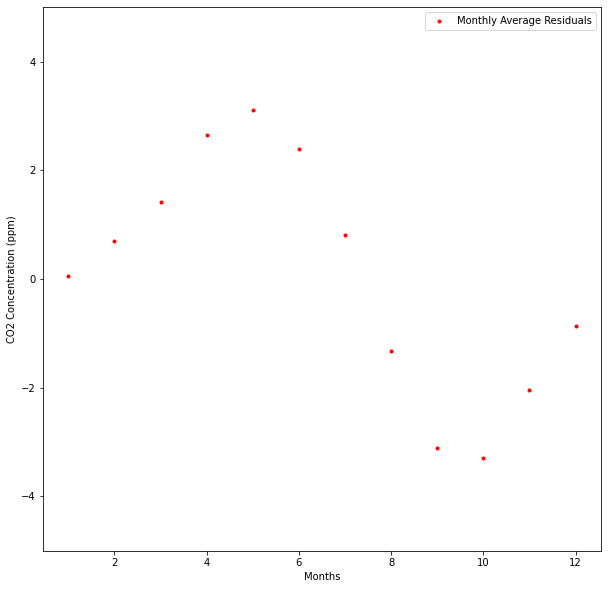

In [406]:
plt.figure(figsize=(10,10))
mon = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(mon, Resavg, 'r.', label='Monthly Average Residuals')
plt.ylim([-5,5])
plt.ylabel('CO2 Concentration (ppm)')
plt.xlabel('Months')
plt.legend()

In [19]:
Monavg = []
for i in range(12):
    print(i)
    Monavg.append(CalcMonAvg(i+1))
    


0
1
2
3
4
5
6
7
8
9
10
11


In [369]:
print(Monavg)

[351.8284482758621, 353.17719298245606, 353.3487931034482, 354.7129310344828, 354.7345762711864, 354.79499999999996, 352.69152542372876, 350.69186440677976, 349.0332203389831, 348.7357894736841, 349.47775862068966, 350.7750000000001]


In [266]:
Monavg[11]

350.7750000000001

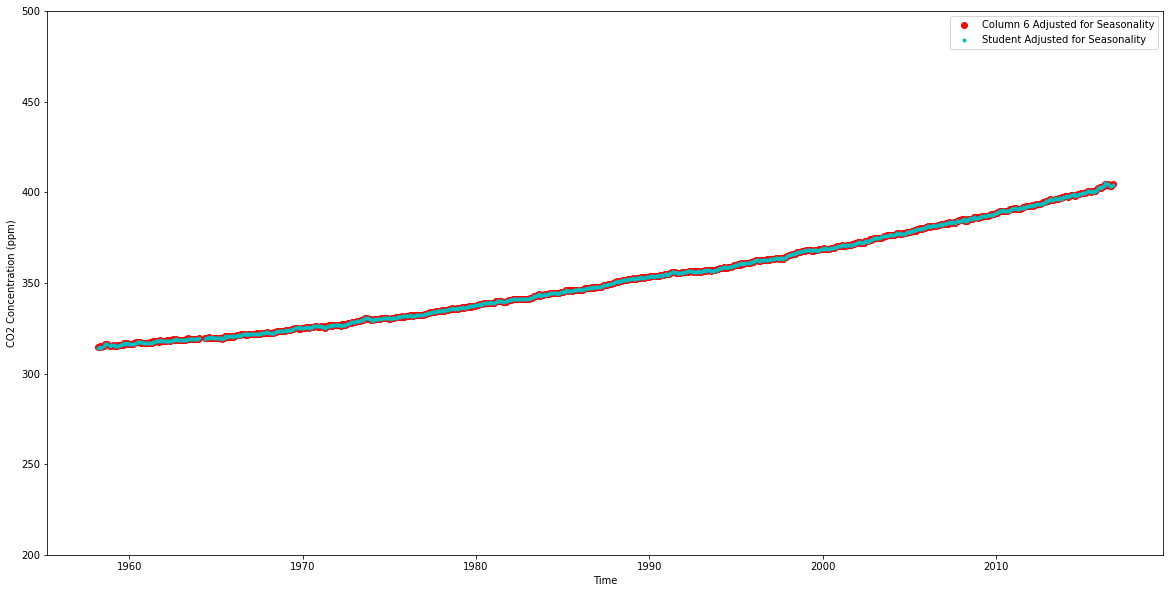

In [405]:
plt.figure(figsize=(20,10))
plt.plot(df_ML.iloc[:,3], df_ML.iloc[:,5], 'ro', label='Column 6 Adjusted for Seasonality')
plt.plot(df_ML.iloc[:,3], df_ML.iloc[:,10], 'c.', label='Student Adjusted for Seasonality')

plt.ylim([200, 500])
plt.ylabel('CO2 Concentration (ppm)')
plt.xlabel('Time')
plt.legend()

In [356]:
p[0]

0.03972237775861334

In [361]:
plt.figure(figsize=(10,10))

mon = float((1,2,3,4,5,6,7,8,9,10,11,12)
pmodel = np.polyfit(mon, Monavg, 3)
fit = p[0]*np.power(mon,3)+p[1]*np.power(mon,2)+p[2]*mon+p[3]
plt.plot(mon, fit, label='Fitted Polynomial')

plt.plot(mon, Monavg, 'r.', label='Monthly Averages')
plt.ylim([330, 370])
plt.ylabel('CO2 Concentration (ppm)')
plt.xlabel('Months')
plt.legend()

SyntaxError: invalid syntax (<ipython-input-361-fcf6553eb3a8>, line 4)

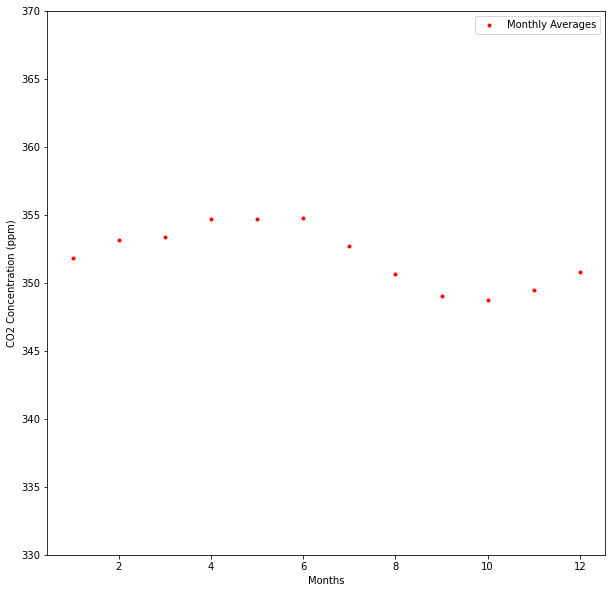

In [372]:
plt.figure(figsize=(10,10))
mon = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(mon, Monavg, 'r.', label='Monthly Averages')
plt.ylim([330, 370])
plt.ylabel('CO2 Concentration (ppm)')
plt.xlabel('Months')
plt.legend()

In [413]:
#Add seasonality to model
#Remove seasonality

def AddResAvg(Res, df):
    AllVal = []
    for row in range(len(df)):
        month = df.iloc[row,1]
        model = df.iloc[row,11]
        newval = model + Resavg[month-1]
        AllVal.append(newval)
        
    df['Model with seasonality'] = AllVal
    return df

In [414]:
AddResAvg(Resavg, df_ML)

,Yr,Mn,Date,Date,CO2,seasonally,fit,seasonally,CO2,seasonally,CO2 minus seasonality,Model,Model with seasonality
2,1958,3,21259,1958.2027,315.69,314.42,316.17,314.90,315.69,314.42,314.271015,314.279058,315.698043
3,1958,4,21290,1958.2877,317.45,315.15,317.28,314.98,317.45,315.15,314.796056,314.347576,317.001520
4,1958,5,21320,1958.3699,317.50,314.74,317.83,315.06,317.50,314.74,314.399097,314.414005,317.514908
6,1958,7,21381,1958.5370,315.86,315.17,315.90,315.21,315.86,315.17,315.055401,314.549550,315.354149
7,1958,8,21412,1958.6219,314.93,316.16,314.05,315.29,314.93,316.16,316.253996,314.618678,313.294682
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,2016,5,42505,2016.3716,407.65,404.26,407.23,403.84,407.65,404.26,404.549097,402.257317,405.358220
701,2016,6,42536,2016.4563,407.00,404.45,406.60,404.05,407.00,404.45,404.610012,402.445426,404.835414
702,2016,7,42566,2016.5383,404.50,403.69,405.06,404.24,404.50,403.69,403.695401,402.627706,403.432305
703,2016,8,42597,2016.6230,402.24,403.78,402.89,404.44,402.24,403.78,403.563996,402.816158,401.492163


In [402]:
#Remove seasonality

def SubMonAvg(Res, df):
    AllVal = []
    for row in range(len(df)):
        month = df.iloc[row,1]
        val = df.iloc[row,4]
        newval = val - Resavg[month-1]
        AllVal.append(newval)
        
    df['CO2 minus seasonality'] = AllVal
    return df

In [403]:
SubMonAvg(Resavg, df_ML)

,Yr,Mn,Date,Date,CO2,seasonally,fit,seasonally,CO2,seasonally,CO2 minus seasonality,Model
2,1958,3,21259,1958.2027,315.69,314.42,316.17,314.90,315.69,314.42,314.271015,314.279058
3,1958,4,21290,1958.2877,317.45,315.15,317.28,314.98,317.45,315.15,314.796056,314.347576
4,1958,5,21320,1958.3699,317.50,314.74,317.83,315.06,317.50,314.74,314.399097,314.414005
6,1958,7,21381,1958.5370,315.86,315.17,315.90,315.21,315.86,315.17,315.055401,314.549550
7,1958,8,21412,1958.6219,314.93,316.16,314.05,315.29,314.93,316.16,316.253996,314.618678
...,...,...,...,...,...,...,...,...,...,...,...,...
700,2016,5,42505,2016.3716,407.65,404.26,407.23,403.84,407.65,404.26,404.549097,402.257317
701,2016,6,42536,2016.4563,407.00,404.45,406.60,404.05,407.00,404.45,404.610012,402.445426
702,2016,7,42566,2016.5383,404.50,403.69,405.06,404.24,404.50,403.69,403.695401,402.627706
703,2016,8,42597,2016.6230,402.24,403.78,402.89,404.44,402.24,403.78,403.563996,402.816158


<AxesSubplot:xlabel="('      Date', '          ')", ylabel="('     CO2', '   [ppm]')">

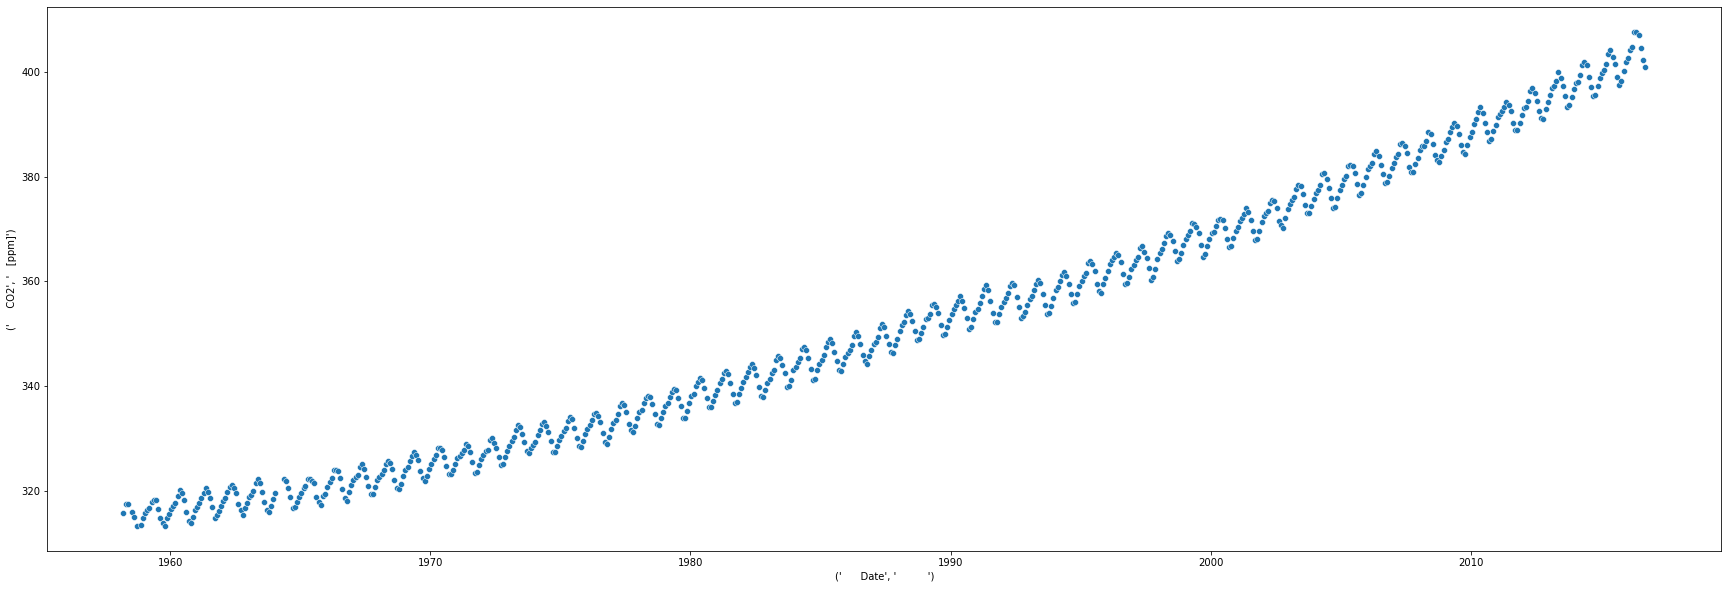

In [82]:
#Plotting the data CO2 ppm over time to visualize the data set
plt.figure(figsize=(30,10))
sns.scatterplot(
    x=df_ML.iloc[:,0], y= df_ML.iloc[:,1],
    data= df_CO2,
    legend="full",
    alpha=1,
)

In [4]:
#(a) Fit the data to a linear model.


xdata=df_ML.iloc[:,3].to_numpy()[:,np.newaxis]
y= df_ML.iloc[:,4].to_numpy()[:,np.newaxis]

#To account for the intercept
Bo = np.ones(len(xdata))[:,np.newaxis]
#Now to concatenate x with the matrix of ones
x = np.hstack((Bo, xdata))

xtrain = x[:550]
ytrain = y[:550]

xval = x[550:624]
yval = y[550:624]

xtest = x[624:]
ytest = y[624:]

In [5]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(xtrain, ytrain)

# Make predictions using the validation set
y_pred_val = regr.predict(xval)
y_pred = regr.predict(x)
y_pred_train =  regr.predict(xtrain)
regr.coef_


array([[0.        , 1.36800557]])

In [410]:
print(regr.coef_)

[[0.         1.36800557]]


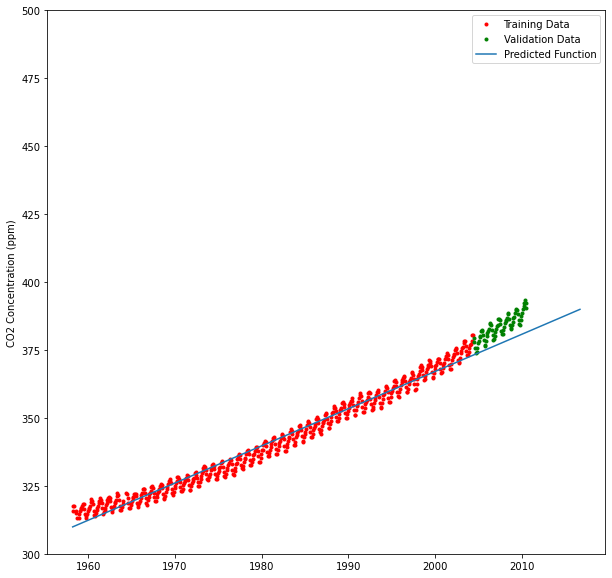

In [196]:
#Plot the data and the fit. 

plt.figure(figsize=(10,10))

plt.plot(xtrain2, ytrain2, 'r.', label='Training Data')
plt.plot(xval2, yval2, 'g.', label='Validation Data')
plt.plot(xdata, y_pred, label='Predicted Function')
plt.ylim([300, 500])
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()

##use blue as color for individual points
#plt.figure(figsize=(30,10))
#plt.scatter(xdata, y)

#use red as color for regression line
#plt.plot(xdata, y_pred, color='red')
#plt.show()



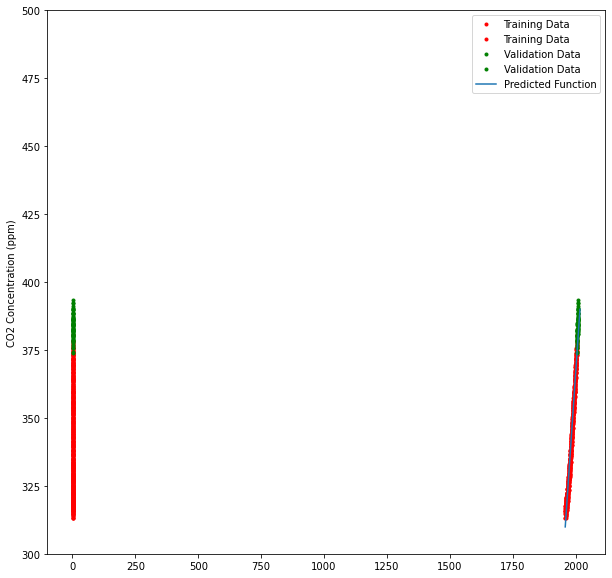

In [153]:
#Plot quadratic function fit with the full dataset as a scatter plot
plt.figure(figsize=(10,10))

plt.plot(xtrain, ytrain, 'r.', label='Training Data')
plt.plot(xval, yval, 'g.', label='Validation Data')
plt.plot(xdata, y_pred, label='Predicted Function')
plt.ylim([300, 500])
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()

In [7]:
#Plot the residual error and comment about it. 
Residual_1 = yval - y_pred_val


MSE1 = (Residual_1**2).mean()
RMSE1 = np.sqrt(MSE1)
MAPE1 = (np.absolute(Residual_1/yval)*100).mean()
print('Mean Square Error', MSE1)
print('Root Mean Square Error', RMSE1)
print('Mean Absolute Percentage Error', MAPE1)
#Report an appropriate
#goodness-of-fitt metric of your choice and provide a justification for it.

Mean Square Error 46.018543392888624
Root Mean Square Error 6.783696882444603
Mean Absolute Percentage Error 1.6251586945820067


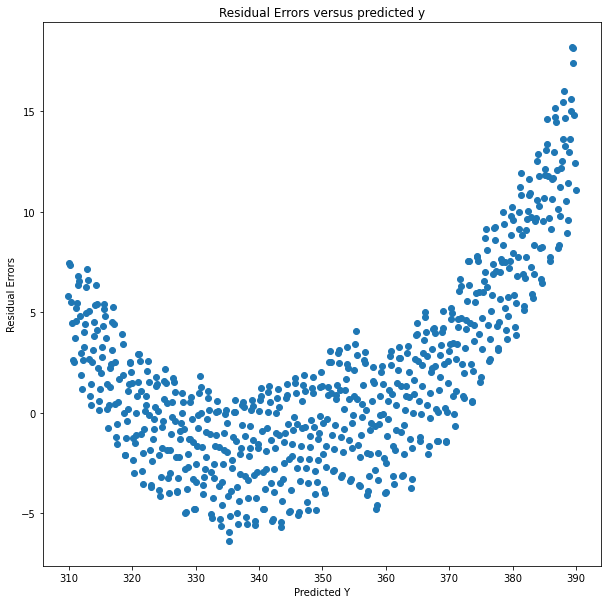

In [111]:
Residual = y - y_pred
plt.figure(figsize=(10,10))

plt.scatter(y_pred, Residual)
plt.title('Residual Errors versus predicted y')
plt.xlabel('Predicted Y')
plt.ylabel('Residual Errors')
plt.show()


In [118]:
xdata.shape

(698, 1)

In [6]:
#Fit the data to a quadratic model 
xdata=df_ML.iloc[:,3].to_numpy()[:,np.newaxis]
y= df_ML.iloc[:,4].to_numpy()[:,np.newaxis]

xtrain2 = xdata[:550]
ytrain2 = y[:550]

xval2 = xdata[550:624]
yval2 = y[550:624]

xtest2 = xdata[624:]
ytest2 = y[624:]




In [7]:
#polynomial fit with degree = 2
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(xtrain2)
x_test_pr = pr.fit_transform(xval2)
xfulldata = pr.fit_transform(xdata)

In [8]:
poly = LinearRegression()
poly.fit(x_train_pr, ytrain2)

LinearRegression()

In [9]:
yhat = poly.predict(x_test_pr)
yhat_train = poly.predict(x_train_pr)
yhat_full_data = poly.predict(xfulldata)

In [179]:
#Plot the residual error and comment about it. 
Residual_2 = ytrain2 - yhat_train


MSE2 = (Residual_2**2).mean()
RMSE2 = np.sqrt(MSE2)
MAPE2 = ((np.absolute(Residual_2)/ytrain2)*100).mean()
print('Mean Square Error', MSE2)
print('Root Mean Square Error', RMSE2)
print('Mean Absolute Percentage Error', MAPE2)
#Report an appropriate
#goodness-of-fitt metric of your choice and provide a justification for it.

Mean Square Error 4.763788575636281
Root Mean Square Error 2.1826104956304686
Mean Absolute Percentage Error 0.5392268830872846


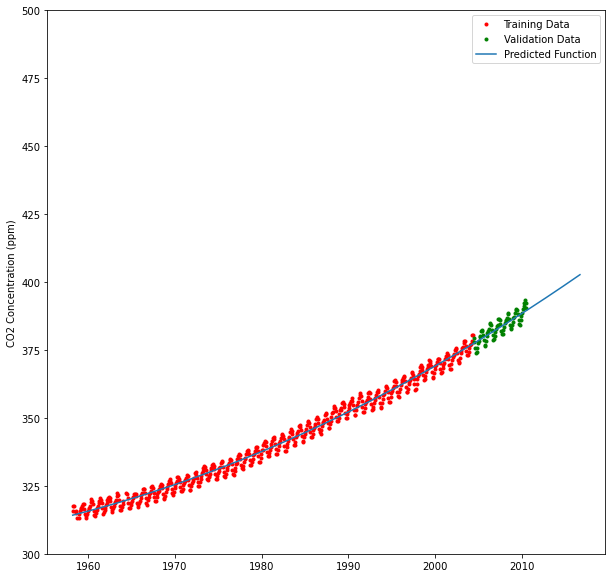

In [152]:
#Plot quadratic function fit with the full dataset as a scatter plot
plt.figure(figsize=(10,10))

plt.plot(xtrain2, ytrain2, 'r.', label='Training Data')
plt.plot(xval2, yval2, 'g.', label='Validation Data')
plt.plot(xdata, yhat_full, label='Predicted Function')
plt.ylim([300, 500])
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()

In [ ]:
#Plot Residuals with validation data set


#Plot Residuals with full data set

In [139]:
poly.coef_

array([[ 0.00000000e+00, -4.58450910e+01,  1.19140844e-02]])

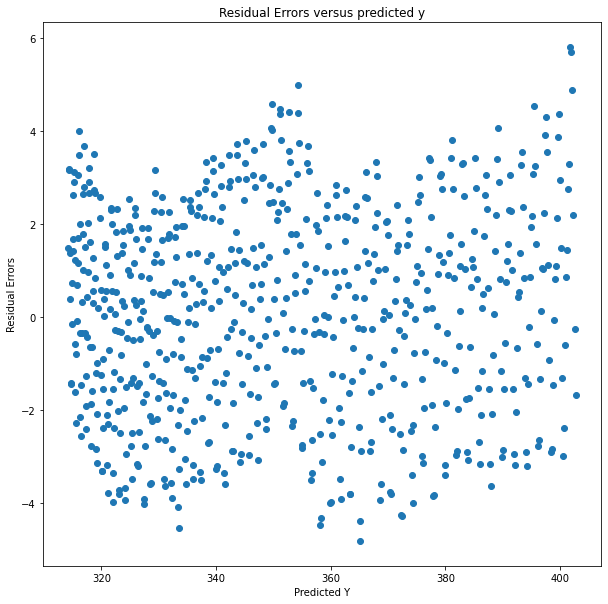

In [160]:
plt.figure(figsize=(10,10))

plt.scatter(yhat_full, Residual_2)
plt.title('Residual Errors versus predicted y')
plt.xlabel('Predicted Y')
plt.ylabel('Residual Errors')
plt.show()



In [183]:
#polynomial fit with degree = 4
pr4 = PolynomialFeatures(degree=4)
x_train_pr4 = pr4.fit_transform(xtrain2)
x_test_pr4 = pr4.fit_transform(xval2)
xfulldata4 = pr4.fit_transform(xdata)

In [184]:
poly4 = LinearRegression()
poly4.fit(x_train_pr4, ytrain2)

LinearRegression()

In [185]:
poly4.coef_

array([[ 0.00000000e+00, -5.06739321e-04, -6.67627166e-01,
         4.45617087e-04, -8.36013243e-08]])

In [191]:
yhat4 = poly4.predict(x_test_pr4)
yhat_train4 = poly4.predict(x_train_pr4)
yhat_full4 = poly4.predict(xfulldata4)

In [192]:
#Plot the residual error and comment about it. 
Residual_4 = y - yhat_full4


MSE4 = (Residual_4**2).mean()
RMSE4 = np.sqrt(MSE4)
MAPE4 = ((np.absolute(Residual_4)/y)*100).mean()
print('Mean Square Error', MSE4)
print('Root Mean Square Error', RMSE4)
print('Mean Absolute Percentage Error', MAPE4)
#Report an appropriate

Mean Square Error 9.35848435357299
Root Mean Square Error 3.0591639958611228
Mean Absolute Percentage Error 0.6524596171188017


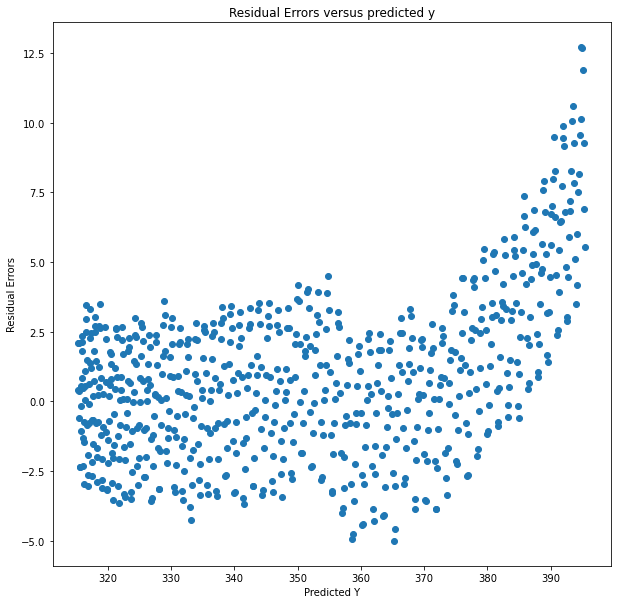

In [193]:
plt.figure(figsize=(10,10))

plt.scatter(yhat_full4, Residual_4)
plt.title('Residual Errors versus predicted y')
plt.xlabel('Predicted Y')
plt.ylabel('Residual Errors')
plt.show()



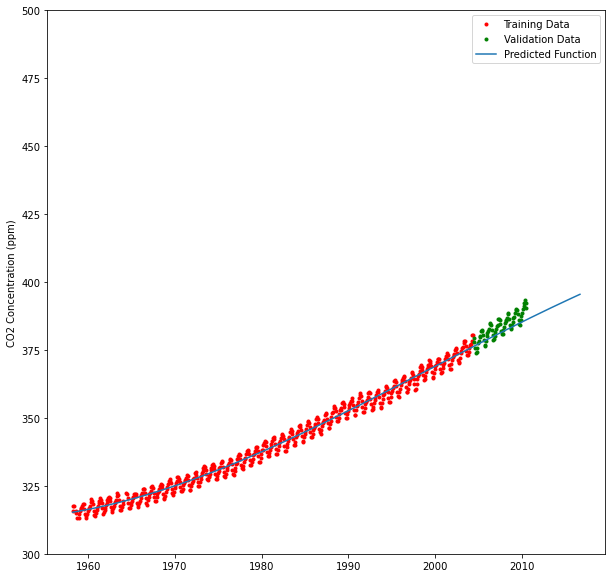

In [194]:
#Plot quartic function fit with the full dataset as a scatter plot
plt.figure(figsize=(10,10))

plt.plot(xtrain2, ytrain2, 'r.', label='Training Data')
plt.plot(xval2, yval2, 'g.', label='Validation Data')
plt.plot(xdata, yhat_full4, label='Predicted Function')
plt.ylim([300, 500])
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()

In [298]:
cols = [0, 1, 2, 5, 6, 7, 8, 9] 
df_ML.drop(df_ML.columns[cols], axis=1, inplace=True)

In [299]:
df_ML.head()

,Date,CO2,CO2 minus seasonality
2,1958.2027,315.69,[276.5535266573898]
3,1958.2877,317.45,[277.01877475979836]
4,1958.3699,317.50,[277.11439364423694]
6,1958.5370,315.86,[277.65467845670616]
7,1958.6219,314.93,[278.79432006809384]


In [10]:
#Fit the data to a quadratic model 
xdata=df_ML.iloc[:,3].to_numpy()[:,np.newaxis]
y= df_ML.iloc[:,4].to_numpy()[:,np.newaxis]

xtrain2 = xdata[:550]
ytrain2 = y[:550]

xval2 = xdata[550:624]
yval2 = y[550:624]

xtest2 = xdata[624:]
ytest2 = y[624:]

#Retrain with xtrain and ytrain data
xretrain = xdata[:624]
yretrain = y[:624]



In [11]:
#polynomial fit with degree = 2
pr = PolynomialFeatures(degree=2)

x_retrain_pr = pr.fit_transform(xretrain)

x_test_pr2 = pr.fit_transform(xtest2)

xfulldata = pr.fit_transform(xdata)

poly = LinearRegression()
Retrain = poly.fit(x_retrain_pr, yretrain)

yhat_retest = poly.predict(x_test_pr2)
yhat_retrain = poly.predict(x_retrain_pr)

In [12]:
yhat_all_re = poly.predict(xfulldata)

In [13]:
#Plot the residual error and comment about it. 
Residual_2re = ytest2 - yhat_retest


MSE2re = (Residual_2re**2).mean()
RMSE2re = np.sqrt(MSE2re)
MAPE2re = ((np.absolute(Residual_2re)/ytest2)*100).mean()
print('Mean Square Error', MSE2re)
print('Root Mean Square Error', RMSE2re)
print('Mean Absolute Percentage Error', MAPE2re)

Mean Square Error 5.853263482682837
Root Mean Square Error 2.4193518724408065
Mean Absolute Percentage Error 0.5184280565546349


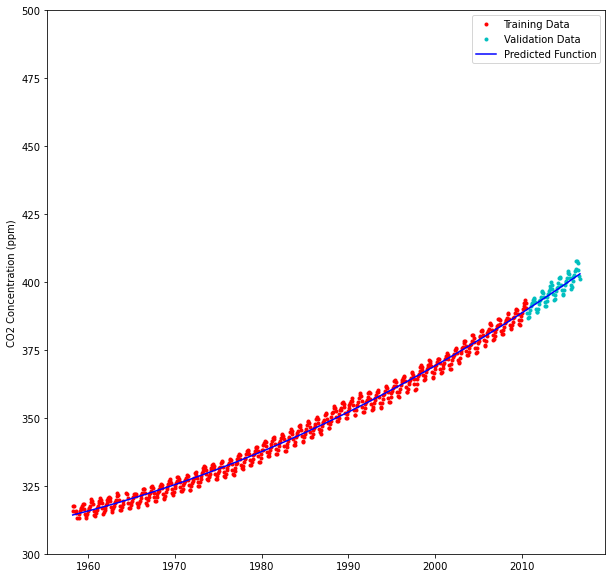

In [311]:
#Plot quadratic function fit with the full dataset as a scatter plot
plt.figure(figsize=(10,10))

plt.plot(xretrain, yretrain, 'r.', label='Training Data')
plt.plot(xtest2, ytest2, 'c.', label='Validation Data')
plt.plot(xdata, yhat_all_re, 'b', label='Predicted Function')
plt.ylim([300, 500])
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()

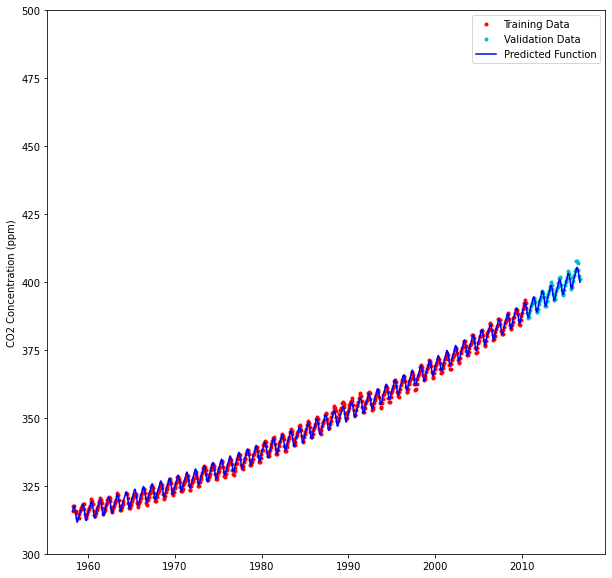

In [416]:


#Plot quadratic function fit with periodicity added with the full dataset as a scatter plot
plt.figure(figsize=(10,10))

plt.plot(xretrain, yretrain, 'r.', label='Training Data')
plt.plot(xtest2, ytest2, 'c.', label='Validation Data')
plt.plot(xdata, df_ML['Model with seasonality'], 'b', label='Predicted Function')
plt.ylim([300, 500])
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()

In [15]:
ymodel = df_ML['Model with seasonality'].to_numpy()[:,np.newaxis]
ymodel.shape

KeyError: 'Model with seasonality'

In [14]:
#Plot the residual error and comment about it. 
Residual_p = yretrain - ymodel[:624]


MSEp = (Residual_p**2).mean()
RMSEp = np.sqrt(MSEp)
MAPEp = (np.absolute(Residual_p/yretrain)*100).mean()
print('Mean Square Error', MSEp)
print('Root Mean Square Error', RMSEp)
print('Mean Absolute Percentage Error', MAPEp)

NameError: name 'ymodel' is not defined

In [429]:
#Plot the residual error and comment about it. 
Residual_pt = ytest2 - ymodel[624:]


MSEpt = (Residual_pt**2).mean()
RMSEpt = np.sqrt(MSEpt)
MAPEpt = (np.absolute(Residual_pt/ytest2)*100).mean()
print('Mean Square Error', MSEpt)
print('Root Mean Square Error', RMSEpt)
print('Mean Absolute Percentage Error', MAPEpt)

Mean Square Error 0.5994435179917772
Root Mean Square Error 0.7742373783225511
Mean Absolute Percentage Error 0.13627265849757855
